## Usining HDBSCAN Clustering on signatures

In [1]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('indicadores2-07-11.csv')[['vl_licitacao','indicador1','indicador2']]
df.shape

(2960, 3)

In [41]:
df[:5]

,vl_licitacao,indicador1,indicador2
0,7000.0,0.917143,1
1,300000.0,1.000010,1
2,44000.0,1.000000,0
3,18000.0,1.000000,0
4,46920.0,0.408696,0


In [42]:
from sklearn import preprocessing
import seaborn as sn

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df.values.astype(float))
df_normalized = pd.DataFrame(scaled_array)
df_normalized[:5]

,0,1,2
0,0.000007,9.778759e-08,1.0
1,0.000300,1.066230e-07,1.0
2,0.000044,1.066220e-07,0.0
3,0.000018,1.066220e-07,0.0
4,0.000047,4.357597e-08,0.0


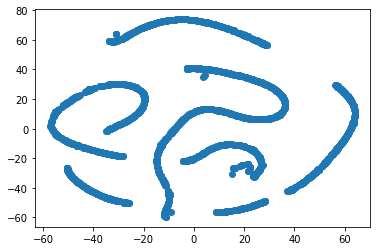

In [43]:
from sklearn.manifold import TSNE

data = df_normalized.to_numpy()
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

In [44]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=35, prediction_data=True).fit(data)

In [50]:
clusterer.labels_[0:10]

array([ 2,  0, 10, 10, 10,  2, 10, 10, -1, -1])

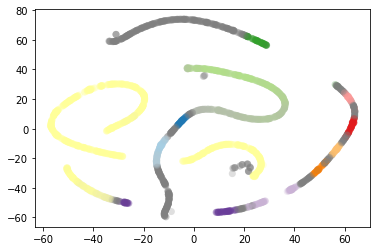

In [46]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

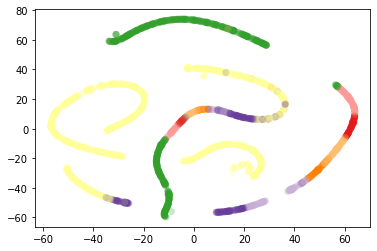

In [47]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

### Outliar Detection

In [ ]:
data = np.load('clusterable_data.npy')
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

In [ ]:
import pandas as pd
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*data.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*data[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

### Predicting clusters for new points

In [ ]:
data = np.load('clusterable_data.npy')
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(data)
pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors);

In [ ]:
test_points = np.random.random(size=(50, 2)) - 0.5

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors);
plt.scatter(*test_points.T, c='k', s=50)

In [ ]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(data.T[0], data.T[1], c=colors);
plt.scatter(*test_points.T, c=test_colors, s=80, linewidths=1, edgecolors='k')

In [ ]:
digits = datasets.load_digits()
data = digits.data
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T,)

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

In [ ]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [sns.desaturate(color_palette[np.argmax(x)], np.max(x))
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

In [ ]:
def top_two_probs_diff(probs):
    sorted_probs = np.sort(probs)
    return sorted_probs[-1] - sorted_probs[-2]

# Compute the differences between the top two probabilities
diffs = np.array([top_two_probs_diff(x) for x in soft_clusters])
# Select out the indices that have a small difference, and a larger total probability
mixed_points = np.where((diffs < 0.001) & (np.sum(soft_clusters, axis=1) > 0.5))[0]
colors = [(0.75, 0.1, 0.1) if x in mixed_points
          else (0.5, 0.5, 0.5) for x in range(data.shape[0])]
plt.scatter(*projection.T, s=50, linewidth=0, c=colors, alpha=0.5)

In [ ]:
fig = plt.figure()
for i, image in enumerate(digits.images[mixed_points][:16]):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(image)
plt.tight_layout()